In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc_params


In [2]:
#Loading the dataset
df = pd.read_csv('/Users/princesingh/Desktop/1/smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
#checking the file size
df.shape

(62630, 16)

In [4]:
#checking file info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   62630 non-null  int64  
 1   UTC          62630 non-null  int64  
 2   Temperature  62630 non-null  float64
 3   Humidity     62630 non-null  float64
 4   TVOC         62630 non-null  int64  
 5   eCO2         62630 non-null  int64  
 6   Raw_H2       62630 non-null  int64  
 7   Raw_Ethanol  62630 non-null  int64  
 8   Pressure     62630 non-null  float64
 9   PM1.0        62630 non-null  float64
 10  PM2.5        62630 non-null  float64
 11  NC0.5        62630 non-null  float64
 12  NC1.0        62630 non-null  float64
 13  NC2.5        62630 non-null  float64
 14  CNT          62630 non-null  int64  
 15  Fire Alarm   62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [5]:
# checking null values
df.isnull().sum()

Unnamed: 0     0
UTC            0
Temperature    0
Humidity       0
TVOC           0
eCO2           0
Raw_H2         0
Raw_Ethanol    0
Pressure       0
PM1.0          0
PM2.5          0
NC0.5          0
NC1.0          0
NC2.5          0
CNT            0
Fire Alarm     0
dtype: int64

In [6]:
#dropping Unnamed: UTC column as it is not relevent for the prediction
df.drop(columns = ['Unnamed: 0','UTC'],axis = 1,inplace = True)

In [7]:
df.head(3)

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0


In [8]:
df.columns

Index(['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2', 'Raw_Ethanol',
       'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT',
       'Fire Alarm'],
      dtype='object')

In [9]:
#checking the value counts for target column
df['Fire Alarm'].value_counts()
# 1 is for Fire cases
# 0 No fire cases

1    44757
0    17873
Name: Fire Alarm, dtype: int64

# Visualisations

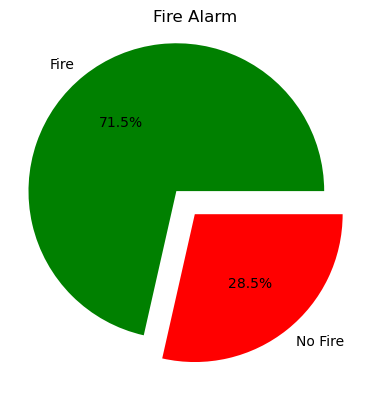

In [10]:
#plotting targeted variable
plt.pie(df['Fire Alarm'].value_counts(),[0.2,0],labels=['Fire','No Fire'],autopct='%1.1f%%',colors=['green','red'])
plt.title('Fire Alarm')
plt.show()

/var/folders/_t/55r7f1v534l7mb97_7ztwh_c0000gn/T/ipykernel_21700/1864910268.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'])


<Axes: xlabel='Temperature', ylabel='Density'>

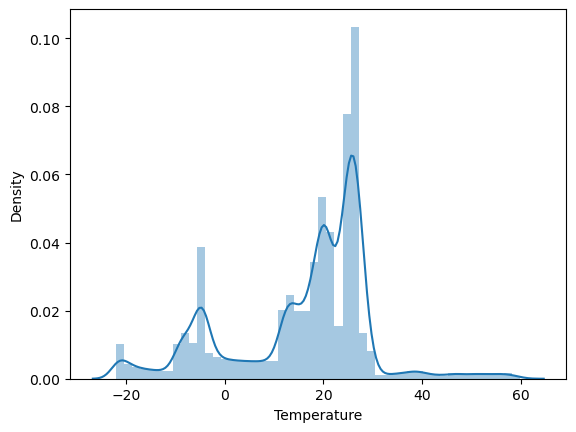

In [11]:
sns.distplot(df['Temperature'])

/var/folders/_t/55r7f1v534l7mb97_7ztwh_c0000gn/T/ipykernel_21700/4017267088.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity'])


<Axes: xlabel='Humidity', ylabel='Density'>

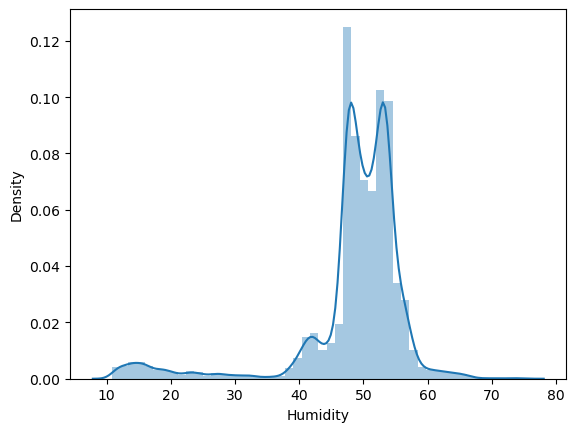

In [12]:
sns.distplot(df['Humidity'])

/var/folders/_t/55r7f1v534l7mb97_7ztwh_c0000gn/T/ipykernel_21700/1786332831.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TVOC'])


<Axes: xlabel='TVOC', ylabel='Density'>

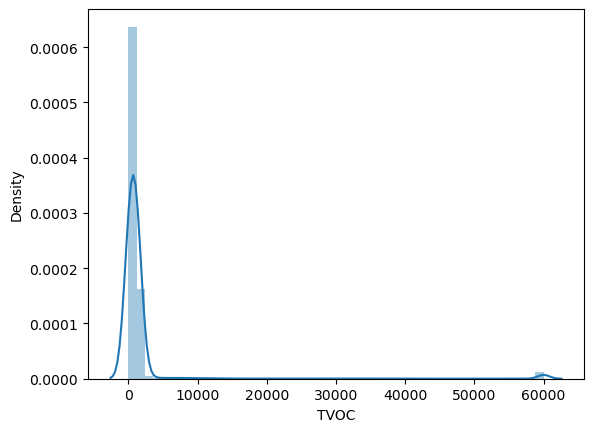

In [13]:
sns.distplot(df['TVOC'])

/var/folders/_t/55r7f1v534l7mb97_7ztwh_c0000gn/T/ipykernel_21700/335241240.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['eCO2'])


<Axes: xlabel='eCO2', ylabel='Density'>

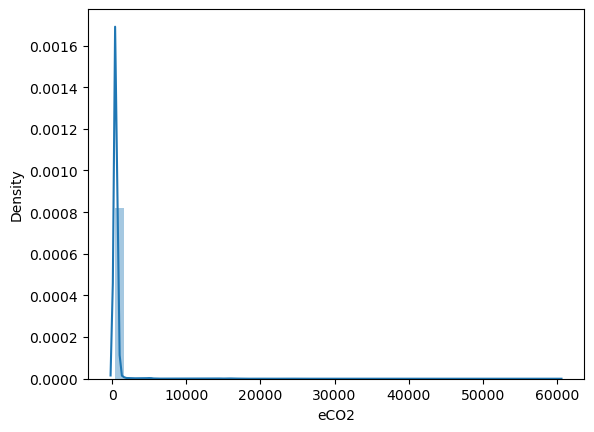

In [14]:
sns.distplot(df['eCO2'])

In [15]:
#checking correlation between them
df.corr()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
Temperature,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw_H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw_Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.083869,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.094741,-0.128118


<Axes: >

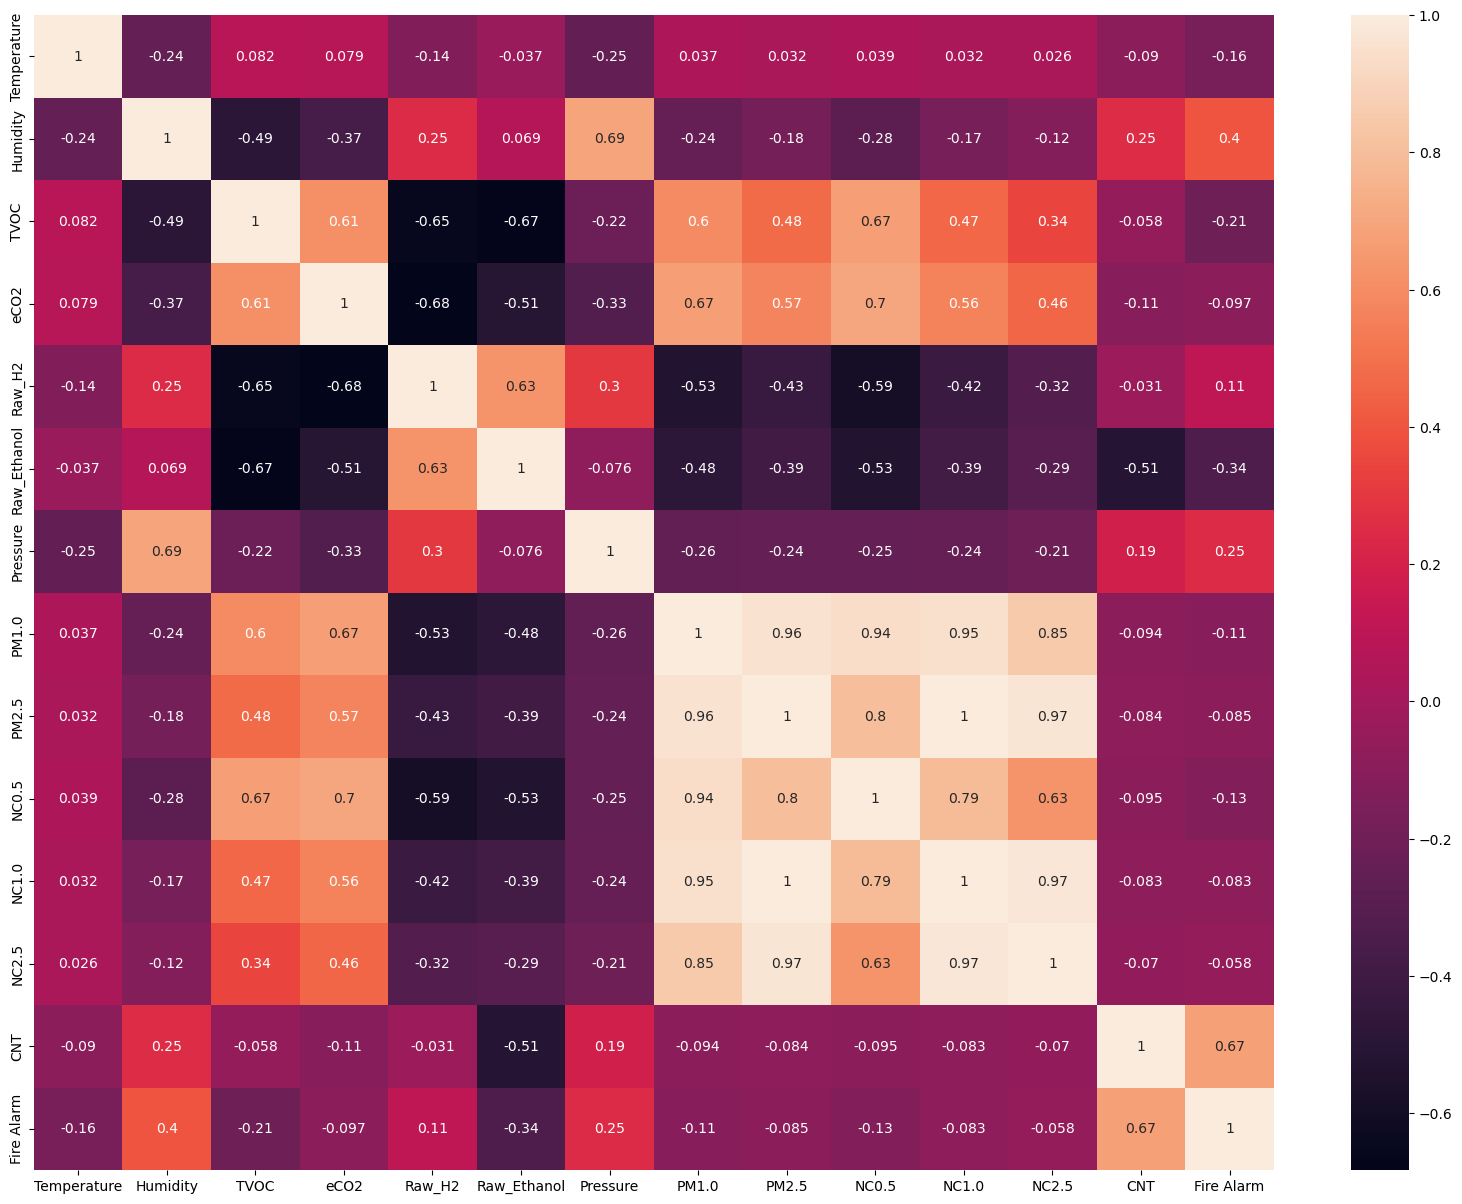

In [16]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(),annot=True)

In [17]:
# As multicollinearity found in NC1.0 and NC2.5, we can drop any one of these columns,also in between PM1.0 and PM2.5

In [18]:
#finding most correlated ones to the fire alarm column
df.corr()['Fire Alarm'].sort_values(ascending=False)

Fire Alarm     1.000000
CNT            0.673762
Humidity       0.399846
Pressure       0.249797
Raw_H2         0.107007
NC2.5         -0.057707
NC1.0         -0.082828
PM2.5         -0.084916
eCO2          -0.097006
PM1.0         -0.110552
NC0.5         -0.128118
Temperature   -0.163902
TVOC          -0.214743
Raw_Ethanol   -0.340652
Name: Fire Alarm, dtype: float64

In [19]:
df.drop(columns = ['NC1.0','PM1.0'],axis = 1,inplace =True)

In [20]:
df.head()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM2.5,NC0.5,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,4,0


In [21]:
# splitting
#independent= all except fire alarm
X=df.drop(columns = ['Fire Alarm'])
X.head()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM2.5,NC0.5,NC2.5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,1
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,2
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,3
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,4


In [22]:
#dependent= fire alarm
y=df['Fire Alarm']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Fire Alarm, dtype: int64

In [23]:
#Scaling the data using MinMax 
#scale = MinMaxScaler()

In [24]:
#X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
#X_scaled.head()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM2.5,NC0.5,NC2.5,CNT
0,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.00000
1,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.00004
2,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.00008
3,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.00012
4,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.00016


In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [27]:
#balancing the data by increase number of no fire cases using SMOT
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [28]:
#before balancing
y_train.value_counts()

1    31391
0    12450
Name: Fire Alarm, dtype: int64

In [29]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [30]:
#after balancing
y_train_smote.value_counts()

0    31391
1    31391
Name: Fire Alarm, dtype: int64

In [31]:
#applying Random forest classifier
model=RandomForestClassifier()
model.fit(x_train_smote, y_train_smote)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train_smote)


In [32]:
#checking accuracy
test_acc = accuracy_score(y_test,y_pred_test)
train_acc = accuracy_score(y_train_smote,y_pred_train)

In [33]:
print('test_acc: ', test_acc)
print('train_acc: ', train_acc)

test_acc:  1.0
train_acc:  1.0


In [34]:
#confusion matrix
pd.crosstab(y_test,y_pred_test)

col_0,0,1
Fire Alarm,,
0,5423,0
1,0,13366


In [35]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5423
           1       1.00      1.00      1.00     13366

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [36]:
#testing with random value
model.predict([[20,57.36,0,400,12306,18520,939.735,0,0,0,0]])

/Users/princesingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [38]:
model.predict([[3.421,57.61,340,400,13100,19871,939.685,1.33,8.82,.031,560]])

/Users/princesingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [39]:
# saving the model

import pickle
pickle.dump(model,open('smk.pkl','wb'))  